## Transfer Learning: ResNet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\nihal\Anaconda3\envs\gpuenv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("../data/kidneyData.csv", index_col=0)

In [3]:
df.head()

,image_id,path,diag,target,Class
0,Tumor- (1044),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
1,Tumor- (83),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
2,Tumor- (580),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
3,Tumor- (1701),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
4,Tumor- (1220),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor


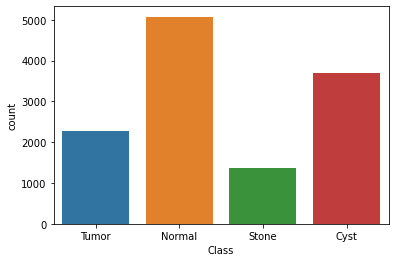

In [4]:
sns.countplot(x='Class', data=df);

In [4]:
import os
import tensorflow as tf

In [5]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

In [6]:
train_dataset = tf.keras.utils.image_dataset_from_directory("../data/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/",
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 12446 files belonging to 4 classes.


In [8]:
class_names = train_dataset.class_names
class_names

['Cyst', 'Normal', 'Stone', 'Tumor']

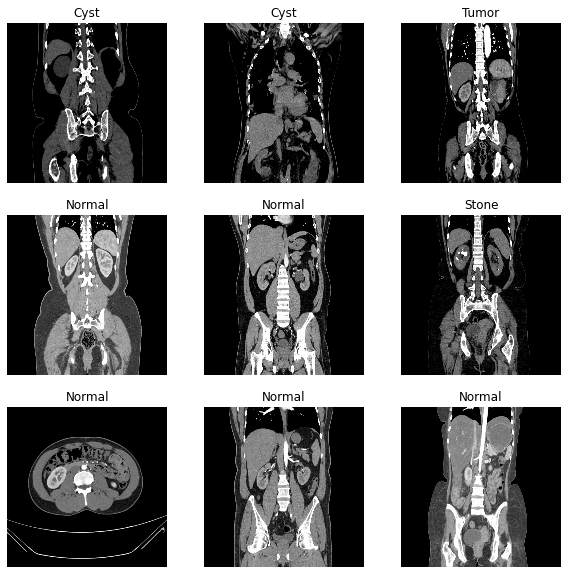

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [10]:
labels

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 0, 3, 1, 1, 2, 1, 1, 1, 0, 1, 3, 1, 3, 0, 1, 2, 1, 0, 1, 1, 2,
       2, 1, 1, 1, 3, 2, 3, 1, 0, 1])>

In [11]:
images[i].shape

TensorShape([160, 160, 3])

In [12]:
base_model = tf.keras.applications.ResNet50(input_shape=(160, 160, 3), include_top=False)

In [7]:
import tensorflow.keras.applications.resnet50 as resnet50

In [8]:
preprocess = resnet50.preprocess_input

In [13]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 2048)


In [14]:
base_model.trainable = False

In [15]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 166, 166, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 80, 80, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 80, 80, 64)   256         ['conv1_conv[0][0]']      

 conv2_block3_2_conv (Conv2D)   (None, 40, 40, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 40, 40, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 40, 40, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 40, 40, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_blo

 conv3_block3_2_conv (Conv2D)   (None, 20, 20, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 20, 20, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 20, 20, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 20, 20, 512)  66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block2_1_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 10, 10, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 10, 10, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 10, 10, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_block5_2_bn (BatchNormal  (None, 10, 10, 256)  1024       ['conv4_block5_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_2_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block5_2_bn[0][0]']      
 n)       

 conv5_block2_1_conv (Conv2D)   (None, 5, 5, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 5, 5, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 5, 5, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_2_conv (Conv2D)   (None, 5, 5, 512)    2359808     ['conv5_block2_1_relu[0][0]']    
                                                                                                  
 conv5_blo

In [16]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 2048)


In [17]:
prediction_layer = tf.keras.layers.Dense(4, activation = 'softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 4)


In [18]:
inputs = tf.keras.Input(shape=(160, 160, 3))
# x = data_augmentation(inputs)
# x = preprocess_input(x)
x = base_model(inputs, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 23,595,908
Trainable params: 8,196
Non-trainable params: 23,587,712
_____________________________________________

In [20]:
len(model.trainable_variables)

2

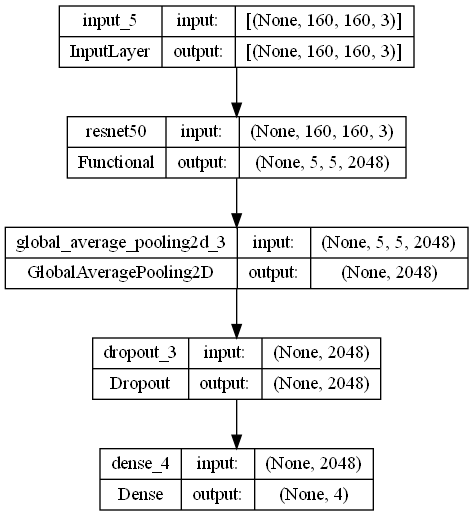

In [64]:
tf.keras.utils.plot_model(model, to_file='ResNet10.png', show_shapes=True)

In [20]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [22]:
val_dataset = train_dataset.take(2000)

In [23]:
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset)

Epoch 1/10
389/389 [==============================] - 101s 249ms/step - loss: 1.3758 - accuracy: 0.4702 - val_loss: 0.7514 - val_accuracy: 0.7325
Epoch 2/10
389/389 [==============================] - 93s 239ms/step - loss: 0.7827 - accuracy: 0.7058 - val_loss: 0.5472 - val_accuracy: 0.8193
Epoch 3/10
389/389 [==============================] - 92s 236ms/step - loss: 0.6172 - accuracy: 0.7684 - val_loss: 0.4424 - val_accuracy: 0.8618
Epoch 4/10
389/389 [==============================] - 78s 200ms/step - loss: 0.5066 - accuracy: 0.8140 - val_loss: 0.3775 - val_accuracy: 0.8858
Epoch 5/10
389/389 [==============================] - 75s 193ms/step - loss: 0.4421 - accuracy: 0.8433 - val_loss: 0.3290 - val_accuracy: 0.8988
Epoch 6/10
389/389 [==============================] - 76s 195ms/step - loss: 0.3880 - accuracy: 0.8642 - val_loss: 0.2891 - val_accuracy: 0.9139
Epoch 7/10
389/389 [==============================] - 77s 199ms/step - loss: 0.3575 - accuracy: 0.8741 - val_loss: 0.2579 - val_a

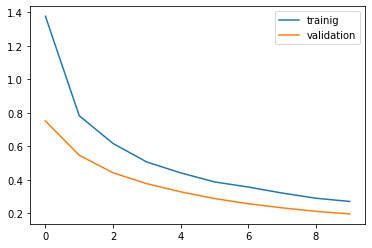

In [24]:
plt.plot(history.history['loss'], label="trainig")
plt.plot(history.history['val_loss'], label="validation")
plt.legend()

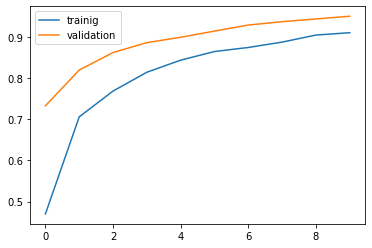

In [25]:
plt.plot(history.history['accuracy'], label="trainig")
plt.plot(history.history['val_accuracy'], label="validation")
plt.legend()

In [26]:
model.save('../models/resnet_10eph')

INFO:tensorflow:Assets written to: ../models/resnet_10eph\assets


INFO:tensorflow:Assets written to: ../models/resnet_10eph\assets


In [8]:
model = tf.keras.models.load_model('../models/resnet_10eph/')

In [9]:
def input_img(path):
    image = tf.image.decode_png(tf.io.read_file(path))
    image = tf.expand_dims(image, axis=0)
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [224,224])
    return image

def normalize_image(img):
    grads_norm = img[:,:,0]+ img[:,:,1]+ img[:,:,2]
    grads_norm = (grads_norm - tf.reduce_min(grads_norm))/ (tf.reduce_max(grads_norm)- tf.reduce_min(grads_norm))
    return grads_norm

def plot_maps(img1, img2,vmin=0.3,vmax=0.7, mix_val=2):
    f = plt.figure(figsize=(15,45))
    plt.subplot(1,3,1)
    plt.imshow(img1,vmin=vmin, vmax=vmax, cmap="ocean")
    plt.axis("off")
    plt.subplot(1,3,2)
    plt.imshow(img2, cmap = "ocean")
    plt.axis("off")
    plt.subplot(1,3,3)
    plt.imshow(img1*mix_val+img2/mix_val, cmap = "ocean" )
    plt.axis("off")

### Saliency Maps Visulization

In [10]:
tumor_img = input_img('../data/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (1001).jpg')
cyst_img = input_img('../data/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1000).jpg')
stone_img = input_img('../data/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone/Stone- (1002).jpg')
normal_img = input_img('../data/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (1002).jpg')

In [11]:
tumor_img = tf.image.resize(tumor_img, size=IMG_SIZE)
cyst_img = tf.image.resize(cyst_img, size=IMG_SIZE)
stone_img = tf.image.resize(stone_img, size=IMG_SIZE)
normal_img = tf.image.resize(normal_img, size=IMG_SIZE)

Tumor

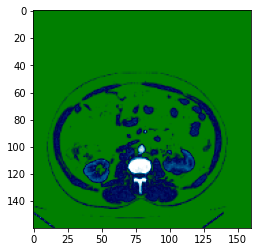

In [31]:
img = tf.reshape(tumor_img, shape=(160, 160, 3))
plt.imshow(normalize_image(img), cmap = "ocean")

In [32]:
result = model(tumor_img)
max_idx = tf.argmax(result, axis=1)

with tf.GradientTape() as tape:
    tape.watch(tumor_img)
    result = model(tumor_img)
    max_score = result[0,max_idx[0]]
    
grads = tape.gradient(max_score, tumor_img)

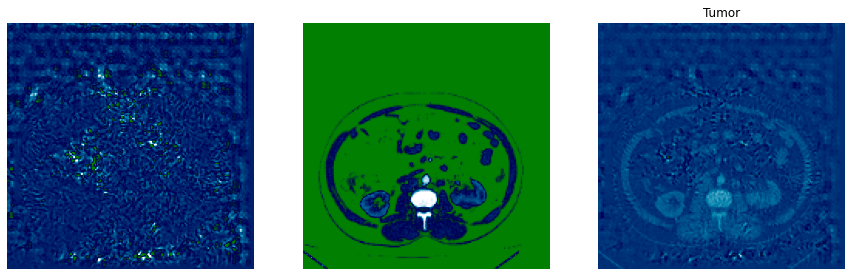

In [33]:
index = 0
plot_maps(normalize_image(grads[index]), normalize_image(img))
plt.title("Tumor");

Cyst

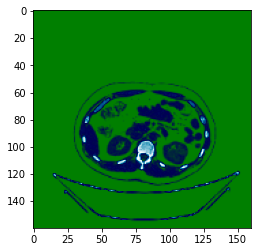

In [34]:
img = tf.reshape(cyst_img, shape=(160, 160, 3))
plt.imshow(normalize_image(img), cmap = "ocean")

In [35]:
result = model(cyst_img)
max_idx = tf.argmax(result, axis=1)

with tf.GradientTape() as tape:
    tape.watch(cyst_img)
    result = model(cyst_img)
    max_score = result[0,max_idx[0]]
    
grads = tape.gradient(max_score, cyst_img)

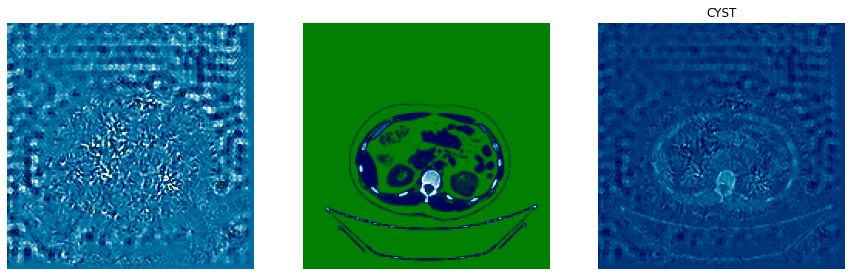

In [36]:
index = 0
plot_maps(normalize_image(grads[index]), normalize_image(img))
plt.title("CYST");

Stone

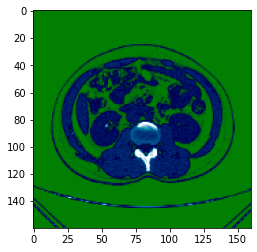

In [37]:
img = tf.reshape(stone_img, shape=(160, 160, 3))
plt.imshow(normalize_image(img), cmap = "ocean")

In [38]:
result = model(stone_img)
max_idx = tf.argmax(result, axis=1)

with tf.GradientTape() as tape:
    tape.watch(stone_img)
    result = model(stone_img)
    max_score = result[0,max_idx[0]]
    
grads = tape.gradient(max_score, stone_img)

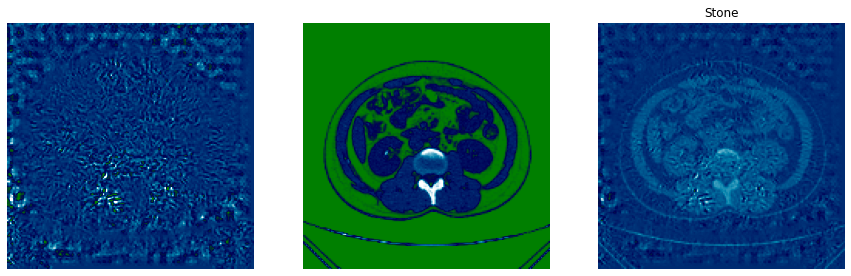

In [39]:
index = 0
plot_maps(normalize_image(grads[index]), normalize_image(img))
plt.title("Stone");

Normal

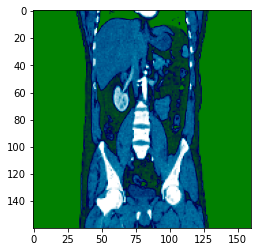

In [40]:
img = tf.reshape(normal_img, shape=(160, 160, 3))
plt.imshow(normalize_image(img), cmap = "ocean")

In [41]:
result = model(normal_img)
max_idx = tf.argmax(result, axis=1)

with tf.GradientTape() as tape:
    tape.watch(normal_img)
    result = model(normal_img)
    max_score = result[0,max_idx[0]]
    
grads = tape.gradient(max_score, normal_img)

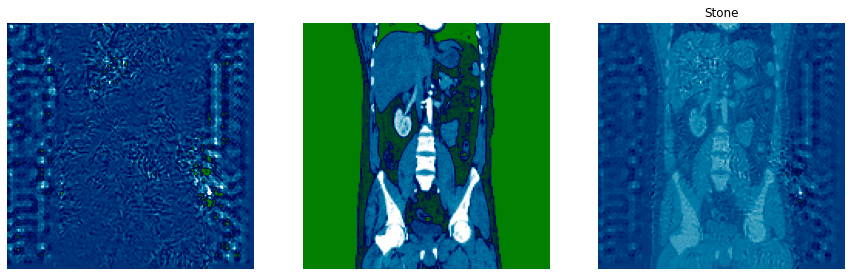

In [42]:
index = 0
plot_maps(normalize_image(grads[index]), normalize_image(img))
plt.title("Stone");

### Shap values

In [14]:
import lime

In [15]:
from skimage.segmentation import mark_boundaries

ImportError: cannot import name 'QhullError' from 'scipy.spatial' (C:\Users\nihal\Anaconda3\envs\gpuenv\lib\site-packages\scipy\spatial\__init__.py)

In [ ]:
lime.lime_base

In [12]:
model = tf.keras.models.load_model('../models/resnet_10eph/')

In [14]:
model_wo_sm = innvestigate.model_wo_softmax(model)

In [15]:
analyzer = innvestigate.create_analyzer("deep_taylor", model_wo_sm)

In [16]:
x = preprocess(stone_img[None])

In [20]:
# tf.compat.v1.disable_eager_execution()

In [20]:
a = analyzer.analyze(x)

Exception: Cannot add conditional mapping after first application.

In [21]:
analyzer = innvestigate.create_analyzer("gradient", model_wo_sm, neuron_selection_mode="index")

In [22]:
analysis = analyzer.analyze(x)

RuntimeError: tf.gradients is not supported when eager execution is enabled. Use tf.GradientTape instead.